# Final Project - Predicting Movie Genres!

![Movie genre header](genre_header.jpg)

Welcome to the final project of CS109b. 

The overall theme of the final project is movie data with a focus on movie genre prediction, because it is an area where we are all more or less application domain experts. First, you will explore your data and the challenges of the problem by exploratory data analysis. Use visualizations to find features that correlate with movie genres. These can be extracted from the movie posters, or meta data, or other data you gather, for example plot summaries or even movie transcripts. You will then compare traditional statistical or machine learning methods like generalized additive models, random forest, Bayesian prediction methods, boosting, and SVM, to deep learning models for movie genre prediction. 

For this project you will work in teams of 3-4 people and there are weekly milestones to guide you along the way. Even though the milestones are graded, they are mainly in place to make sure you stay in contact with your TF and make progress with the project. Throughout the project you also have room for creativity and to pursue your own ideas. While you need to hand in the milestones at the appropriate due date, there is nothing preventing you from working on a later milestone ahead of time. We suggest that you read through the whole project and all milestones in the beginning to be able to plan ahead. The project is pretty open-ended, so you can be creative and let your data science knowledge shine! 

For each milestone you will submit a notebook, in raw (`.ipynb`) and PDF formats, containing the deliverables of that week and the extra work you did so far. The notebooks need to contain your code, comments, explanations, thoughts, and visualizations. The final deliverables are a two-minute screencast, a report in paper style for a general data science audience, and all your data and code that you developed throughout the project. 

Below is a description of the data and the milestones with their due dates. All work is due by 11:59PM on the due date unless otherwise specified. We expect you to have the mandatory parts finished by the milestone due dates, and there will be no extensions. However, we strongly encourage you to plan ahead. For example, you need to think about the classification task early on to plan how you want to assemble your training data, and it is beneficial to start the deep learning work as early as possible. There is nothing hindering you to already train a model in the EDA phase to get a better feel for what challenges might lie ahead with the data. You should also see the milestone requirements as a basis for your own creativity, and we expect that most of you will go beyond the mandatory deliverables. For example, if you have a great idea about an interesting question that has to do with movie genre, but cannot be answered with the data from TMDb or IMDb, feel free to gather more data from somewhere else. 

We provide a data interface in Python, because it is convenient for IMDb, and we will use Python for the deep learning part. Specifically we will use Keras, a deep learning library that provides a high level interface to Google's Tensorflow framework for deep learning. However, if you feel that you prefer to do some of the work, e.g., visualizations or data cleanup, in R then feel free to use it. You can also use Spark to preprocess your data, especially if you collect large amounts of it from other sources. 

*Important:* Your grade for a milestone will depend on the required deliverables you submit at the due date for that milestone. But every milestone, especially the final project submission, can contain additional cool work you did that goes beyond the deliverables spelled out below. 


### Logistics 

Please adhere to the following guidelines for all submissions:
- one submission per team
- notebooks should be submitted as PDF and as raw (`.ipynb`) version
- all notebooks should be executed so they contain relevant visualizations, and other results
- try to make it as easy as possible for the TFs to get all relevant information about your work
- do not submit big data sets, please provide a readme file with a link instead
- the final report should also be submitted as pdf

### Movie Data:

The project is based on two different sources of movie data: [IMDb](http://www.imdb.com/) and [TMDb](https://www.themoviedb.org/). TMDb is great, because it provides the movie posters in addition to the metadata. This is crucial for the deep learning part, in which you will try to predict movie genres from posters. IMDb has more metadata available and will supplement the TMDb data you have. 

TMDb provides an easy to use [API](https://www.themoviedb.org/documentation/api) that allows you to download the data selectively. IMDb does not provide an API, but there is a Python interface available to access the metadata. We will use [IMDbPY](http://imdbpy.sourceforge.net/), which is already installed on the AMI and virtual box images for your convenience.

*Important*: Please remember to limit your data rate when obtaining the data. Play nicely and do not just spam servers as fast as you can. This will prevent your IP from getting banned. The easiest way to do this is to use the [sleep](http://stackoverflow.com/questions/510348/how-can-i-make-a-time-delay-in-python) function in Python.


### Milestone 1: Getting to know your data, due Wednesday, April 5, 2017

In the beginning you should get acquainted with the data sources and do some EDA. Sign up for the TMDb [API](https://www.themoviedb.org/documentation/api), and try to download the poster of your favorite movie from within your notebook. Compare the genre entries of IMDb and TMDb for this movie and see if they are the same. Think about and write down some questions that you would like to answer in the following weeks. Keep the storytelling aspect of your final report in mind and do some pen and paper sketches about the visualizations you would like to produce. Include photographs of those sketches in your notebook. 

Most of the time a data scientist spends on a project is spent on cleaning the data. We are lucky that the data we have is already pretty clean. The Python interface to the IMDb ftp files does a lot of the additional work of cleaning as well. However, you will notice that the genre list for each movie from both databases can have different lengths. This needs to be changed in order to train a model to predict the movie genre. It is up to you to think about possible ways to address this problem and to implement one of them. There is no absolute right answer here. It depends on your interests and which questions you have in mind for the project. 

Optionally, you could also scrape additional data sources, such as Wikipedia, to obtain plot summaries. That data may give you additional useful features for genre classification. 

To guide your decision process, provide at least one visualization of how often genres are mentioned together in pairs. Your visualization should clearly show if a horror romance is more likely to occur in the data than a drama romance.

The notebook to submit for this milestone needs to at least include:

- API code to access the genre and movie poster path of your favorite movie
- Genre for this movie listed by TMDb and IMDb
- A list of the 10 most popular movies of 2016 from TMDb and their genre obtained via the API
- Comments on what challenges you see for predicting movie genre based on the data you have, and how to address them 
- Code to generate the movie genre pairs and a suitable visualization of the result
- Additional visualization sketches and EDA with a focus on movie genres
- A list of questions you could answer with this and related data. Get creative here!

The EDA questions do not necessarily have to tie into the modeling part later on. Think freely about things that might be interesting, like which actors are very specific to a genre? Are action movies more prone to producing sequels than romances? However, as you keep the focus on movie genres, think also about correlations you might discover that can help build features from the metadata for prediction. Is the length of a movie title correlated with genre?


In [170]:
import json
import urllib
import cStringIO
from PIL import Image
from imdb import IMDb
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1
- API code to access the genre and movie poster path of your favorite movie

In [90]:
# Our API key: 2dc6c9f1d17bd39dcbaef83321e1b5a3
# chosen favorite movie: La La Land
# for the movie url name, need to go to the website and search
la_la_land = urllib.urlopen("https://api.themoviedb.org/3/movie/313369-la-la-land?api_key=2dc6c9f1d17bd39dcbaef83321e1b5a3")

la_json = json.loads(la_la_land.read())

la_json

{u'adult': False,
 u'backdrop_path': u'/fp6X6yhgcxzxCpmM0EVC6V9B8XB.jpg',
 u'belongs_to_collection': None,
 u'budget': 30000000,
 u'genres': [{u'id': 35, u'name': u'Comedy'},
  {u'id': 18, u'name': u'Drama'},
  {u'id': 10402, u'name': u'Music'},
  {u'id': 10749, u'name': u'Romance'}],
 u'homepage': u'http://www.lalaland.movie/',
 u'id': 313369,
 u'imdb_id': u'tt3783958',
 u'original_language': u'en',
 u'original_title': u'La La Land',
 u'overview': u'Mia, an aspiring actress, serves lattes to movie stars in between auditions and Sebastian, a jazz musician, scrapes by playing cocktail party gigs in dingy bars, but as success mounts they are faced with decisions that begin to fray the fragile fabric of their love affair, and the dreams they worked so hard to maintain in each other threaten to rip them apart.',
 u'popularity': 9.04128,
 u'poster_path': u'/ylXCdC106IKiarftHkcacasaAcb.jpg',
 u'production_companies': [{u'id': 2527, u'name': u'Marc Platt Productions'},
  {u'id': 10161, u'name

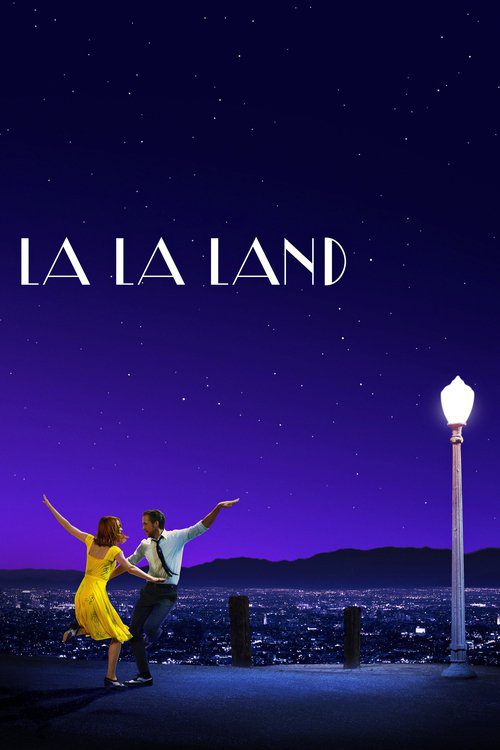

In [161]:
# la la land poster path and poster
la_la_poster = cStringIO.StringIO(urllib.urlopen("https://image.tmdb.org/t/p/w500/ylXCdC106IKiarftHkcacasaAcb.jpg").read())
img = Image.open(la_la_poster)
img

# Part 2
- Genre for this movie listed by TMDb and IMDB

In [174]:
# this is how you access the poster path
data = la_json
print "Poster path", data['poster_path']

# this is how you access the genres
print data['genres']

print data['genres'][0]

print data['genres'][0]['name']

Poster path /ylXCdC106IKiarftHkcacasaAcb.jpg
[{u'id': 35, u'name': u'Comedy'}, {u'id': 18, u'name': u'Drama'}, {u'id': 10402, u'name': u'Music'}, {u'id': 10749, u'name': u'Romance'}]
{u'id': 35, u'name': u'Comedy'}
Comedy


In [160]:
ia = IMDb()

s_result = ia.search_movie('La La land')
# print s_result

lalaland = ia.get_movie('3783958')

print lalaland

print lalaland['genre']

# Print the long imdb canonical title and movieID of the results.
for item in s_result:
    print item['long imdb canonical title'], item.movieID

# Retrieves default information for the first result (a Movie object).
the_unt = s_result[0]
ia.update(the_unt)

# Print some information.
print the_unt['runtime']
print the_unt['rating']

La La Land
[u'Comedy', u'Drama', u'Music', u'Musical', u'Romance']
La Land (I), La (2016) 3783958
"La Land, La" (2010) 1288499
La Land (III), La (????) 5764046
"La Land, La" (2012) 2230123
La Land: The Reality, La La Land Parody, La (2017) 6619210
La Land (I) (in development), La (????) 4000424
La Land, La (2009) (TV) 1433139
La Land, La (2006) 0903629
Going Down in LA-LA Land (2011) 1599296
Nocturnal Animals (2016) 4550098
LA Land, LA (2008) (TV) 1179042
"Living in LA LA Land" (2011) 2064427
Brainiacs in La La Land (2010) 1566491
La Land (III), La (2016) 5810584
"La Land, La" (2008) 3420146
Love in La La Land? (2005) (V) 1589481
Gary Numan: Android in La La Land (2016) 5378224
Fairy Tale of La La Land, A (2014) 3519940
"Roeper's Reviews" La La Land (2016) 6349474
"La Land (2013) (TV Episode)  - Season 3 | Episode 7  - The Real Housewives of Miami, La" (2011) 3180878
[u'128']
8.4


### Analysis
We see that genre classification is different between TMDb and IMDb. For La La Land, TMDb classifies it as Comedy, Drama and Music, while IMBd classifies it as Comedy, Drama, Music, Musical and Romance. 

The difference between the two dateset would make it difficult to predict movie genres. One way we could resolve this is to narrow down genre classes by eliminating genres that are very close to each other, like Music and Musical. Eventually we will be able to create genres that are consistent on both sides.

# Part 3 
- A list of the 10 most popular movies of 2016 from TMDb and their genre obtained via the API

In [165]:
# part 3 - top 10 most popular movies of 2016 from TMDb and their genre
top_2016_1 = urllib.urlopen("https://api.themoviedb.org/3/discover/movie?api_key=2dc6c9f1d17bd39dcbaef83321e1b5a3&sort_by=popularity.desc&include_adult=false&include_video=false&page=1&primary_release_year=2016")
top_2016_1_json = json.loads(top_2016_1.read())

# get genre list
genre_list = urllib.urlopen("https://api.themoviedb.org/3/genre/movie/list?api_key=2dc6c9f1d17bd39dcbaef83321e1b5a3&language=en-US")

genre_list_json = json.loads(genre_list.read()) 

genre_lst = {}
for i in genre_list_json['genres']:
    genre_lst[i['id']] = str(i['name'])
    
# top most popular movies of 2016
top_2016_1 = urllib.urlopen("https://api.themoviedb.org/3/discover/movie?api_key=2dc6c9f1d17bd39dcbaef83321e1b5a3&sort_by=popularity.desc&include_adult=false&include_video=false&page=1&primary_release_year=2016")
top_2016_1_json = json.loads(top_2016_1.read())


for i in top_2016_1_json['results']:
    print i['title'], [genre_lst[j] for j in i['genre_ids']]


Sing ['Animation', 'Comedy', 'Drama', 'Family', 'Music']
Fantastic Beasts and Where to Find Them ['Adventure', 'Action', 'Fantasy']
Finding Dory ['Adventure', 'Animation', 'Comedy', 'Family']
Deadpool ['Action', 'Adventure', 'Comedy', 'Romance']
Rogue One: A Star Wars Story ['Action', 'Drama', 'Science Fiction', 'War']
Doctor Strange ['Action', 'Adventure', 'Fantasy', 'Science Fiction']
Arrival ['Drama', 'Science Fiction']
Captain America: Civil War ['Action', 'Science Fiction']
Underworld: Blood Wars ['Action', 'Horror']
Lion ['Drama']
Zootopia ['Animation', 'Adventure', 'Family', 'Comedy']
Hidden Figures ['History', 'Drama']
Hacksaw Ridge ['Drama', 'History', 'War']
Why Him? ['Comedy']
Passengers ['Adventure', 'Drama', 'Romance', 'Science Fiction']
X-Men: Apocalypse ['Action', 'Adventure', 'Fantasy', 'Science Fiction']
Assassin's Creed ['Action', 'Adventure', 'Fantasy', 'Science Fiction']
Batman v Superman: Dawn of Justice ['Action', 'Adventure', 'Fantasy']
Miss Peregrine's Home for 

# Part 4
- Comments on what challenges you see for predicting movie genre based on the data you have, and how to address them

Challenges:
* The correlations we are getting are weak except along the diagonal, so we need to increase the size of our dataset. 
* It seems that we usually have more than 1 genre per movie. It will be difficult to predict genres in this case, and we will need to implement multi-label classification.
* It seems that the TMDb API only allows 20 movie results per page. We will need to query multiple times to get a larger dataset. 
* IMDb and TMDb list differnt genres for each movie. If we are using both dataset, we need to find a way to combine the results. We could do this by simplifying genres.
* There are a lot of ways we can use the TMDb dataset. We need to decide what data we are going to use. So far, we are thinking about randomly sampling 2000 movies in the whole dataset and perform genre analysis on them.
* The data we pulled is unbalanced because they are the more popular movies. In the future, we need to consider how to sample from the whole dataset to make it balanced among genres. 

# Part 5, 6
- Code to generate the movie genre pairs and a suitable visualization of the result
- Additional visualization sketches and EDA with a focus on movie genres

We have explored the IMDb Kaggle dataset and created a list of top 200 movies released in 2016 for EDA purposes. The code to create movie genre pairs and the visualizations are as follows.

# IMDB Kaggle Dataset

TODO - explain why we are using the dataset and explain the graphic results we obtained

In [66]:
# download IMDB kaggle dataset
imdb_kaggle = pd.read_csv('movie_metadata.csv')
imdb_kaggle.head()
imdb_kaggle.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

Relevant columns: genres, movie_title, plot_keywords, title_year, director_name

In [178]:
df = imdb_kaggle[['genres','movie_title','plot_keywords','title_year','imdb_score','director_name']]
df.head()

,genres,movie_title,plot_keywords,title_year,imdb_score,director_name
0,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic,2009.0,7.9,James Cameron
1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...,2007.0,7.1,Gore Verbinski
2,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist,2015.0,6.8,Sam Mendes
3,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...,2012.0,8.5,Christopher Nolan
4,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,7.1,Doug Walker


In [129]:
# process the genres 
select = df
g = select['genres'].str.split('|').apply(Series, 1).stack()
g.index = g.index.droplevel(-1)
g.name = 'genres'
del select['genres']
select = select.join(s)
select.head()

,movie_title,plot_keywords,title_year,imdb_score,director_name,genres
0,Avatar,avatar|future|marine|native|paraplegic,2009.0,7.9,James Cameron,Action
0,Avatar,avatar|future|marine|native|paraplegic,2009.0,7.9,James Cameron,Adventure
0,Avatar,avatar|future|marine|native|paraplegic,2009.0,7.9,James Cameron,Fantasy
0,Avatar,avatar|future|marine|native|paraplegic,2009.0,7.9,James Cameron,Sci-Fi
1,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...,2007.0,7.1,Gore Verbinski,Action


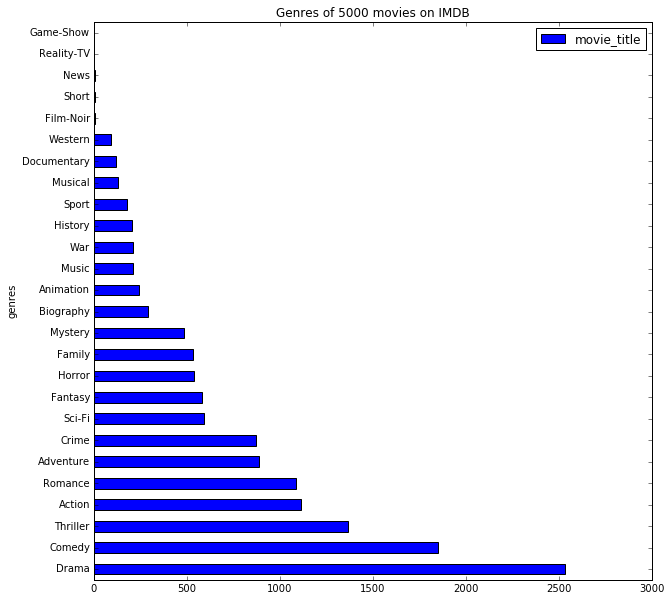

In [91]:
counts_df = (pd.DataFrame(select.groupby('genres').movie_title.nunique())).sort_values('movie_title', ascending=False )
counts_df.head()

# visualization
counts = counts_df[['movie_title']].plot.barh(stacked=True, title = 'Genres of 5000 movies on IMDB', figsize=(10, 10))
counts

In [219]:
# prepare movie genre data for heatmap
# list of genres 
imdb_kaggle_genres = select.genres.unique()
genres_n = len(imdb_kaggle_genres)
imdb_kaggle_genres.astype(str)

# colnames
cols = ['movie_title', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller',
       'Documentary', 'Romance', 'Animation', 'Comedy', 'Family',
       'Musical', 'Mystery', 'Western', 'Drama', 'History', 'Sport',
       'Crime', 'Horror', 'War', 'Biography', 'Music', 'Game-Show',
       'Reality-TV', 'News', 'Short', 'Film-Noir']

genres = cols[1:]
# create zero filled df_
df_ = pd.DataFrame(0, index = df.index, columns = cols)
df_['movie_title'] = df.movie_title

# for every genre 
for n in range(0, genres_n-1):
    # for every movie
    for i in df.index:
        # if genre is listed in df for this movie, set value to 1
        if genres[n] in df.iloc[i,0]: df_.iloc[i,n+1] = 1

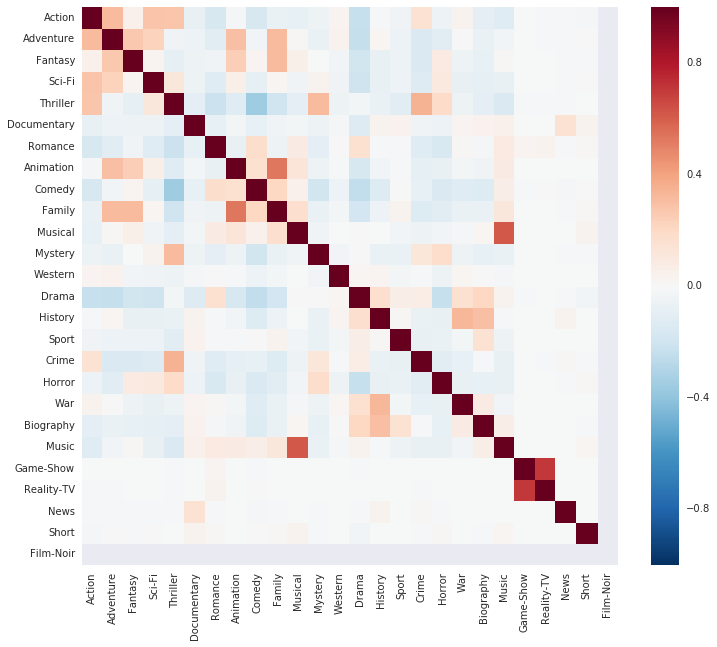

In [218]:
# heatmap using seaborn
fig, ax = plt.subplots(figsize=(12,10)) 
corr = df_.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

### Analysis
Some pairs of genres that are positively correlated are war and history, biography and history, family and animation, action and adventure, crime and thriller. Some pairs of genres that are negatively correlated are thriller and comedy, horror and drama, adventure and drama.

# TMDb top 200 movies released in 2016 by popularity

In [168]:
# create a top 200 list by sending the query 5 times

top_2016_2 = urllib.urlopen("https://api.themoviedb.org/3/discover/movie?api_key=2dc6c9f1d17bd39dcbaef83321e1b5a3&sort_by=popularity.desc&include_adult=false&include_video=false&page=2&primary_release_year=2016")
top_2016_2_json = json.loads(top_2016_2.read())

top_2016_3 = urllib.urlopen("https://api.themoviedb.org/3/discover/movie?api_key=2dc6c9f1d17bd39dcbaef83321e1b5a3&sort_by=popularity.desc&include_adult=false&include_video=false&page=3&primary_release_year=2016")
top_2016_3_json = json.loads(top_2016_3.read())

top_2016_4 = urllib.urlopen("https://api.themoviedb.org/3/discover/movie?api_key=2dc6c9f1d17bd39dcbaef83321e1b5a3&sort_by=popularity.desc&include_adult=false&include_video=false&page=4&primary_release_year=2016")
top_2016_4_json = json.loads(top_2016_4.read())

top_2016_5 = urllib.urlopen("https://api.themoviedb.org/3/discover/movie?api_key=2dc6c9f1d17bd39dcbaef83321e1b5a3&sort_by=popularity.desc&include_adult=false&include_video=false&page=5&primary_release_year=2016")
top_2016_5_json = json.loads(top_2016_5.read())

top_2016_6 = urllib.urlopen("https://api.themoviedb.org/3/discover/movie?api_key=2dc6c9f1d17bd39dcbaef83321e1b5a3&sort_by=popularity.desc&include_adult=false&include_video=false&page=6&primary_release_year=2016")
top_2016_6_json = json.loads(top_2016_6.read())

top_2016_7 = urllib.urlopen("https://api.themoviedb.org/3/discover/movie?api_key=2dc6c9f1d17bd39dcbaef83321e1b5a3&sort_by=popularity.desc&include_adult=false&include_video=false&page=7&primary_release_year=2016")
top_2016_7_json = json.loads(top_2016_7.read())

top_2016_8 = urllib.urlopen("https://api.themoviedb.org/3/discover/movie?api_key=2dc6c9f1d17bd39dcbaef83321e1b5a3&sort_by=popularity.desc&include_adult=false&include_video=false&page=8&primary_release_year=2016")
top_2016_8_json = json.loads(top_2016_8.read())

top_2016_9 = urllib.urlopen("https://api.themoviedb.org/3/discover/movie?api_key=2dc6c9f1d17bd39dcbaef83321e1b5a3&sort_by=popularity.desc&include_adult=false&include_video=false&page=9&primary_release_year=2016")
top_2016_9_json = json.loads(top_2016_9.read())

top_2016_10 = urllib.urlopen("https://api.themoviedb.org/3/discover/movie?api_key=2dc6c9f1d17bd39dcbaef83321e1b5a3&sort_by=popularity.desc&include_adult=false&include_video=false&page=10&primary_release_year=2016")
top_2016_10_json = json.loads(top_2016_10.read())


top_2016_json = top_2016_1_json["results"]

def append_to_top(file):
    for i in file["results"]:
        top_2016_json.append(i)

append_to_top(top_2016_2_json)
append_to_top(top_2016_3_json)
append_to_top(top_2016_4_json)
append_to_top(top_2016_5_json)
append_to_top(top_2016_6_json)
append_to_top(top_2016_7_json)
append_to_top(top_2016_8_json)
append_to_top(top_2016_9_json)
append_to_top(top_2016_10_json)


In [169]:
# now we want to convert the file into pandas dataframe so we can better process it 
genre_ids, overview, popularity, poster_path, title, vote_average, vote_count = [], [], [], [], [], [], []

for movie in top_2016_json:
    genre_ids.append(movie["genre_ids"])
    overview.append(movie["overview"])
    popularity.append(movie["popularity"])
    poster_path.append(movie["poster_path"])
    title.append(movie["title"])
    vote_average.append(movie["vote_average"])
    vote_count.append(movie["vote_count"])

data = {'title': title, 'overview': overview, 'popularity': popularity, 'popularity': popularity, 'poster_path': poster_path, 'vote_average': vote_average,  'vote_count': vote_count, 'genre_ids': genre_ids,}
top_2016_df = pd.DataFrame(data = data)
top_2016_df.head()

,genre_ids,overview,popularity,poster_path,title,vote_average,vote_count
0,"[16, 35, 18, 10751, 10402]",A koala named Buster recruits his best friend ...,76.005907,/s9ye87pvq2IaDvjv9x4IOXVjvA7.jpg,Sing,6.7,1007
1,"[12, 28, 14]","In 1926, Newt Scamander arrives at the Magical...",39.239379,/gri0DDxsERr6B2sOR1fGLxLpSLx.jpg,Fantastic Beasts and Where to Find Them,7.0,3137
2,"[12, 16, 35, 10751]",Dory is reunited with her friends Nemo and Mar...,31.769363,/z09QAf8WbZncbitewNk6lKYMZsh.jpg,Finding Dory,6.7,2917
3,"[28, 12, 35, 10749]",Based upon Marvel Comics’ most unconventional ...,26.382598,/inVq3FRqcYIRl2la8iZikYYxFNR.jpg,Deadpool,7.3,7639
4,"[28, 18, 878, 10752]",A rogue band of resistance fighters unite for ...,25.082126,/qjiskwlV1qQzRCjpV0cL9pEMF9a.jpg,Rogue One: A Star Wars Story,7.3,2932


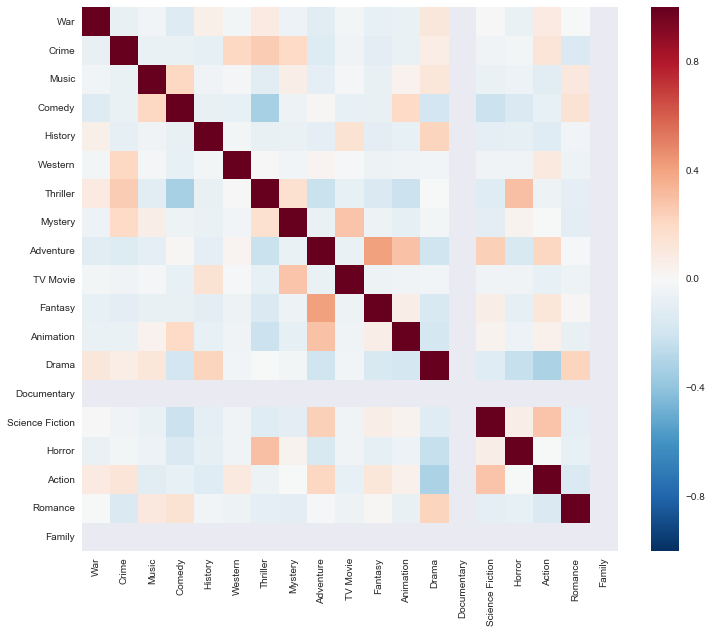

In [176]:
# genre ids genre_lst.keys()
# genre names  genre_lst.values()
cols = ['title', '10752', '80', '10402', '35', '36', '37', '53', '9648', '12', '10770', '14', '16', '18', '99', 
        '878', '27', '28', '10749', '10751']

# create zero filled df_
top_df = pd.DataFrame(0, index=top_2016_df.index, columns = cols)
top_df['title'] = top_2016_df.title

# for every genre 
for n in range(0, len(genre_lst.keys())-1):
    # for every movie
    for i in top_2016_df.index:
        # if genre is listed in df for this movie, set value to 1
        if genre_lst.keys()[n] in top_2016_df.iloc[i,0]: top_df.iloc[i,n+1] = 1 

# heatmap using seaborn
fig, ax = plt.subplots(figsize=(12,10)) 
corr = top_df.corr()
sns.heatmap(corr, 
            xticklabels=genre_lst.values(),
            yticklabels=genre_lst.values())
plt.show()

### Analysis
In the TMDb dataset, we see even less correlation among genres. There are some correlated ones like Fantasy and Adventure, but most genres are relatively uncorrelated to each other. 

In [172]:
# now let's see which genres are popular 

# create new df for genre
genre_data = {'genre': genre_lst.values(), 'id' : genre_lst.keys()}
genre_top200 = pd.DataFrame(data = genre_data)

genre_top200['total_pop'] = np.zeros(len(genre_lst.keys()))
genre_top200['movie_counts'] = np.zeros(len(genre_lst.keys()))
genre_top200['total_vote_counts'] = np.zeros(len(genre_lst.keys()))
genre_top200['total_vote_avg'] = np.zeros(len(genre_lst.keys()))
genre_top200['average_pop'] = np.zeros(len(genre_lst.keys()))
genre_top200['average_vote_counts'] = np.zeros(len(genre_lst.keys()))
genre_top200['average_vote_avg'] = np.zeros(len(genre_lst.keys()))

# iterate through the top 200 data for each genre
for i in range(len(top_2016_df.genre_ids)):
    for id in top_2016_df.genre_ids[i]:
        # total pop
        genre_top200.set_value(genre_top200.loc[genre_top200['id'] == id].index, "total_pop", genre_top200.loc[genre_top200['id'] == id]["total_pop"]+top_2016_df.popularity[i])
        # movie counts
        genre_top200.set_value(genre_top200.loc[genre_top200['id'] == id].index, "movie_counts", genre_top200.loc[genre_top200['id'] == id]["movie_counts"]+1)
        # total_vote_counts
        genre_top200.set_value(genre_top200.loc[genre_top200['id'] == id].index, "total_vote_counts", genre_top200.loc[genre_top200['id'] == id]["total_vote_counts"]+top_2016_df.vote_count[i])
        # total vote average
        genre_top200.set_value(genre_top200.loc[genre_top200['id'] == id].index, "total_vote_avg", genre_top200.loc[genre_top200['id'] == id]["total_vote_avg"]+top_2016_df.vote_average[i])  

In [159]:
# get the average values too
for i in genre_top200.index:
    if genre_top200["movie_counts"][i] != 0.:
        # average pop
        genre_top200.set_value(i, "average_pop", genre_top200["total_pop"][i]/genre_top200["movie_counts"][i])
        # average vote counts
        genre_top200.set_value(i, "average_vote_counts", genre_top200["total_vote_counts"][i]/genre_top200["movie_counts"][i])
        # average vote average
        genre_top200.set_value(i, "average_vote_avg", genre_top200["total_vote_avg"][i]/genre_top200["movie_counts"][i])

genre_top200      

,genre,id,total_pop,movie_counts,total_vote_counts,total_vote_avg,average_pop,average_vote_counts,average_vote_avg
0,War,10752,62.634696,8.0,6501.0,53.6,7.829337,812.625000,6.700000
1,Crime,80,104.355838,24.0,21461.0,147.3,4.348160,894.208333,6.137500
2,Music,10402,93.873824,6.0,5082.0,41.4,15.645637,847.000000,6.900000
3,Comedy,35,372.266707,59.0,49231.0,368.1,6.309605,834.423729,6.238983
4,History,36,69.784838,12.0,6718.0,81.7,5.815403,559.833333,6.808333
5,Western,37,13.987825,3.0,2571.0,18.3,4.662608,857.000000,6.100000
6,Thriller,53,253.916752,61.0,34094.0,374.3,4.162570,558.918033,6.136066
7,Mystery,9648,53.408661,14.0,8019.0,86.3,3.814904,572.785714,6.164286
8,Adventure,12,374.418141,49.0,69462.0,305.0,7.641187,1417.591837,6.224490
9,TV Movie,10770,7.761504,3.0,74.0,19.2,2.587168,24.666667,6.400000


# Part 7
- A list of questions you could answer with this and related data. Get creative here!

Our data could help us answer the following questions.

* Predicting genres based on plot overview and title
* Predicting genres based on poster color/composition/faces
* How are genre popularity changed over the years?
* How are genre numbers changed over the years?
* How are genres related to each other? Would having one genre likely lead to having another?
* How are genres related to popularity and user voting?


# Story Telling Plan
We would like to have our project explore how human brain recognizes movie genres using machine learning. 

As humans, when we see movie poster, its title, its plot summary, its budgets and perhaps the actors in the film, we could fairly easily guess what kind of of movie it is.

Now, we would like to use computers to simulate the process. Specifically, we will analyze how the colors/composition/human faces of a poster could affect genre classification, how keywords in title and plot summary could contribute to its genre, and if possible, how budgets and actors movie genre classification.

We would like to build a ensemble model to movie genres based on the predictors above, and we would like to explore which factors are important, which factors are not. 

Finally, we could do a small research to find out how similar the process could be for humans and machine

# A few sketches
<img src="sketches/sketch1.jpg">
<img src="sketches/sketch2.jpg">
<img src="sketches/sketch3.jpg">

### Milestone 2: Assembling training data, due Wednesday, April 12, 2017

We are aware that you have little time this week, due to the midterm. So this milestone is a bit easier to achieve than the others. The goal for this week is to prepare the data for the modeling phase of the project. You should end up with a typical data setup of training data X and data labels Y.

The exact form of X and Y depends on the ideas you had previously. In general though Y should involve the genre of a movie, and X the features you want to include to predict the genre. Remember from the lecture that more features does not necessarily equal better prediction performance. Use your application knowledge and the insight you gathered from your genre pair analysis and additional EDA to design Y. Do you want to include all genres? Are there genres that you assume to be easier to separate than others? Are there genres that could be grouped together? There is no one right answer here. We are looking for your insight, so be sure to describe your decision process in your notebook. 

In preparation for the deep learning part we strongly encourage you to have two sets of training data X, one with the metadata and one with the movie posters. Make sure to have a common key, like the movie ID, to be able to link the two sets together. Also be mindful of the data rate when you obtain the posters. Time your requests and choose which poster resolution you need. In most cases w500 should be sufficient, and probably a lower resolution will be fine.

The notebook to submit this week should at least include:

- Discussion about the imbalanced nature of the data and how you want to address it
- Description of your data
- What does your choice of Y look like?
- Which features do you choose for X and why? 
- How do you sample your data, how many samples, and why?

*Important*: You do not need to upload the data itself to Canvas.

### Milestone 3: Traditional statistical and machine learning methods, due Wednesday, April 19, 2017

Think about how you would address the genre prediction problem with traditional statistical or machine learning methods. This includes everything you learned about modeling in this course before the deep learning part. Implement your ideas and compare different classifiers. Report your results and discuss what challenges you faced and how you overcame them. What works and what does not? If there are parts that do not work as expected, make sure to discuss briefly what you think is the cause and how you would address this if you would have more time and resources. 

You do not necessarily need to use the movie posters for this step, but even without a background in computer vision, there are very simple features you can extract from the posters to help guide a traditional machine learning model. Think about the PCA lecture for example, or how to use clustering to extract color information. In addition to considering the movie posters it would be worthwhile to have a look at the metadata that IMDb provides. 

You could use Spark and the [ML library](https://spark.apache.org/docs/latest/ml-features.html#word2vec) to build your model features from the data. This may be especially beneficial if you use additional data, e.g., in text form.

You also need to think about how you are going to evaluate your classifier. Which metrics or scores will you report to show how good the performance is?

The notebook to submit this week should at least include:

- Detailed description and implementation of two different models
- Description of your performance metrics
- Careful performance evaluations for both models
- Visualizations of the metrics for performance evaluation
- Discussion of the differences between the models, their strengths, weaknesses, etc. 
- Discussion of the performances you achieved, and how you might be able to improve them in the future

#### Preliminary Peer Assessment

It is important to provide positive feedback to people who truly worked hard for the good of the team and to also make suggestions to those you perceived not to be working as effectively on team tasks. We ask you to provide an honest assessment of the contributions of the members of your team, including yourself. The feedback you provide should reflect your judgment of each team member’s:

- Preparation – were they prepared during team meetings?
- Contribution – did they contribute productively to the team discussion and work?
- Respect for others’ ideas – did they encourage others to contribute their ideas?
- Flexibility – were they flexible when disagreements occurred?

Your teammate’s assessment of your contributions and the accuracy of your self-assessment will be considered as part of your overall project score.

Preliminary Peer Assessment: [https://goo.gl/forms/WOYC7pwRCSU0yV3l1](https://goo.gl/forms/WOYC7pwRCSU0yV3l1)

### Milestone 4: Deep learning, due Wednesday, April 26, 2017

For this milestone you will (finally) use deep learning to predict movie genres. You will train one small network from scratch on the posters only, and compare this one to a pre-trained network that you fine tune. [Here](https://keras.io/getting-started/faq/#how-can-i-use-pre-trained-models-in-keras) is a description of how to use pretrained models in Keras.

You can try different architectures, initializations, parameter settings, optimization methods, etc. Be adventurous and explore deep learning! It can be fun to combine the features learned by the deep learning model with a SVM, or incorporate meta data into your deep learning model. 

**Note:** Be mindful of the longer training times for deep models. Not only for training time, but also for the parameter tuning efforts. You need time to develop a feel for the different parameters and which settings work, which normalization you want to use, which model architecture you choose, etc. 

It is great that we have GPUs via AWS to speed up the actual computation time, but you need to be mindful of your AWS credits. The GPU instances are not cheap and can accumulate costs rather quickly. Think about your model first and do some quick dry runs with a larger learning rate or large batch size on your local machine. 

The notebook to submit this week should at least include:

- Complete description of the deep network you trained from scratch, including parameter settings, performance, features learned, etc. 
- Complete description of the pre-trained network that you fine tuned, including parameter settings, performance, features learned, etc. 
- Discussion of the results, how much improvement you gained with fine tuning, etc. 
- Discussion of at least one additional exploratory idea you pursued

### Milestone 5: Final submission, report and screencast, due Wednesday, May 3, 2017

The grand finale! Gather all your experiences, ideas, results, and discussions into one coherent final report that tells a compelling story and produce a 2 minute screencast that summarizes it. 

Your report needs to be max. 6 pages long (no more!) and include text and visualizations. Your audience are data scientists who did not spend any time pondering movie genre classification problems. Those data scientists do have the same background as you (e.g., you do not need to explain what PCA means) but they are not familiar with your data and the specific problems and questions you faced. Make sure to use good storytelling principles to write your reports. 

The screencast is for the same audience and needs to be max. 2 minutes long (no longer!). Do not just scroll through your notebook while talking--that is boring and confusing. You can extract visualizations from your notebook or produce new visuals and slides for a narrated presentation. Please use a good microphone and test the sound quality. Do not underestimate the time it takes to do a good job on your screencast. Start early, write a script, and collect additional materials that you might want to show. 

[Upload](https://support.google.com/youtube/answer/57407?co=GENIE.Platform%3DDesktop&hl=en) your screenscast to YouTube.

What to submit this week:

- Up to date versions of all your notebooks
- README to go with the notebooks that explains how much the notebooks changed since the milestone submissions. This is to guide your TF to find the relevant updates
- The 6 page final report as a PDF
- The link to your 2 minute screencast on YouTube
- A link to a .zip file with all your cleaned data

#### Final Peer Assessment

It is important to provide positive feedback to people who truly worked hard for the good of the team and to also make suggestions to those you perceived not to be working as effectively on team tasks. We ask you to provide an honest assessment of the contributions of the members of your team, including yourself. The feedback you provide should reflect your judgment of each team member’s:

- Preparation – were they prepared during team meetings?
- Contribution – did they contribute productively to the team discussion and work?
- Respect for others’ ideas – did they encourage others to contribute their ideas?
- Flexibility – were they flexible when disagreements occurred?

Your teammate’s assessment of your contributions and the accuracy of your self-assessment will be considered as part of your overall project score.

Final Peer Assessment: [https://goo.gl/forms/YYFqGbDEfFWeNaSC2](https://goo.gl/forms/YYFqGbDEfFWeNaSC2)